In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten 
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# data loading - mnist

(mtrain_image, mtrain_labels), (mtest_image, mtest_labels) = mnist.load_data()

# reshape to have a single channel
mtrain_image = mtrain_image.reshape((mtrain_image.shape[0], 28, 28, 1))
mtest_image = mtest_image.reshape((mtest_image.shape[0], 28, 28, 1))

# one hot encode target values
mtrain_labels = to_categorical(mtrain_labels)
mtest_labels = to_categorical(mtest_labels)

In [4]:
# data loading - fashion mnist

(ftrain_image, ftrain_labels), (ftest_image, ftest_labels) = fmnist.load_data()

# reshape to have a single channel
ftrain_image = ftrain_image.reshape((ftrain_image.shape[0], 28, 28, 1))
ftest_image = ftest_image.reshape((ftest_image.shape[0], 28, 28, 1))

# one hot encode target values
ftrain_labels = to_categorical(ftrain_labels)
ftest_labels = to_categorical(ftest_labels)

In [5]:
# Normalization

# Mnist
mtrain_norm = mtrain_image/255.0
mtest_norm = mtest_image/255.0

# Fashion Mnist
ftrain_norm = ftrain_image/255.0
ftest_norm = ftest_image/255.0

### Model - mnist

In [24]:
m_model = Sequential()
# "he_uniform" -> Draws samples from a uniform distribution within [-limit, limit], 
# where limit = sqrt(6 / fan_in) (fan_in is the number of input units in the weight tensor)
m_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
m_model.add(MaxPool2D((2, 2)))
m_model.add(Flatten())
m_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
m_model.add(Dense(10, activation='softmax'))

# compile model
m_model.compile(optimizer=SGD(lr=0.01, momentum=0.9), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

m_model.fit(mtrain_norm, mtrain_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.3019 - accuracy: 0.9069
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0565 - accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0332 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0245 - accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0162 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0107 - accuracy: 0.9977
Epoch 7/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0085 - accuracy: 0.9978
Epoch 8/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0047 - accuracy: 0.9990
Epoch 9/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0030 - accuracy: 0.9995
Epoch 10/10
1875/1875 [==============================] - 44s 24m

In [25]:
_, acc = m_model.evaluate(mtest_norm, mtest_labels, verbose=1)
print("\nTest accuracy:", acc)

313/313 [==============================] - 8s 26ms/step - loss: 0.0394 - accuracy: 0.9879

Test accuracy: 0.9879000186920166


### Saving model & predictions

In [26]:
m_model.save("mnist_CnnModel.model")

INFO:tensorflow:Assets written to: mnist_CnnModel.model/assets


In [27]:
mnist_cnn = tf.keras.models.load_model("mnist_CnnModel.model")
mnist_preds = mnist_cnn.predict([mtest_image])

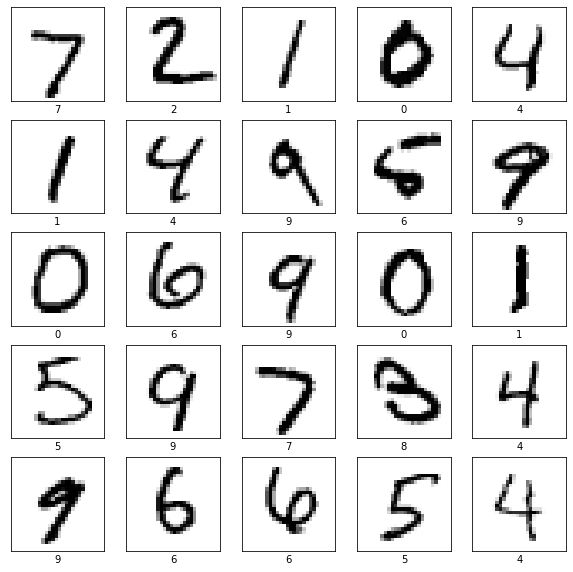

In [33]:
# Verify and check the predictions

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mtest_image[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(mnist_preds[i]))
plt.show()

### Model - fashion mnist

In [8]:
f_model = Sequential()
# "he_uniform" -> Draws samples from a uniform distribution within [-limit, limit], 
# where limit = sqrt(6 / fan_in) (fan_in is the number of input units in the weight tensor)
f_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
f_model.add(MaxPool2D((2, 2)))
f_model.add(Flatten())
f_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
f_model.add(Dense(10, activation='softmax'))

# compile model
f_model.compile(optimizer=SGD(lr=0.01, momentum=0.9), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

f_model.fit(ftrain_norm, ftrain_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5473 - accuracy: 0.8053
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2934 - accuracy: 0.8932
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2388 - accuracy: 0.9122
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2178 - accuracy: 0.9200
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1845 - accuracy: 0.9319
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1693 - accuracy: 0.9390
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1533 - accuracy: 0.9440
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1375 - accuracy: 0.9486
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1200 - accuracy: 0.9564
Epoch 10/10
1875/1875 [==============================] - 20s 11ms

In [9]:
_, acc = f_model.evaluate(ftest_norm, ftest_labels, verbose=1)
print("\nTest accuracy:", acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.2842 - accuracy: 0.9135

Test accuracy: 0.9135000109672546


### Saving model & predictions

In [10]:
f_model.save("fmnist_CnnModel.model")

INFO:tensorflow:Assets written to: fmnist_CnnModel.model/assets


In [11]:
fmnist_cnn = tf.keras.models.load_model("fmnist_CnnModel.model")
fmnist_preds = fmnist_cnn.predict([ftest_image])

In [12]:
fclass_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

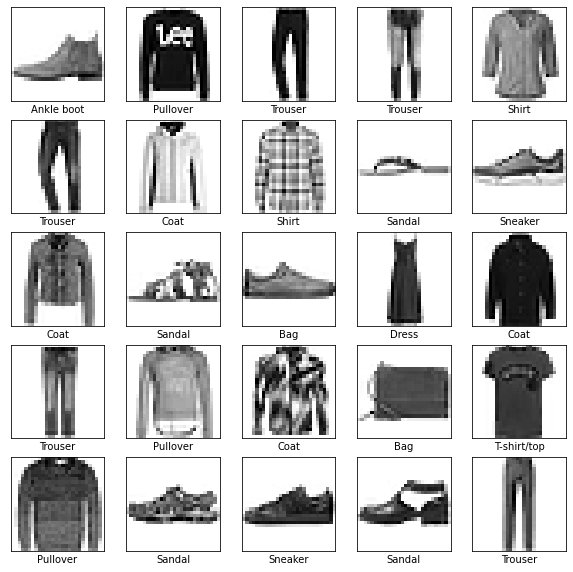

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ftest_image[i], cmap=plt.cm.binary)
    plt.xlabel(fclass_names[np.argmax(fmnist_preds[i])])
plt.show()

## TA DA